# PROJECT: Bank Marketing (Term Deposit Prediction)

Build a Decision Tree classifier to predict if the client will subscribe to a Term Deposit based on their demographic and behavioural data.

# Dataset
This dataset is a Bank Marketing dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
The data is related to a Portuguese banking institution's direct marketing campaigns (phone calls). Often, more than one contact to the same client was required, to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


In [71]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [72]:
df = pd.read_csv('BankMarketing.csv')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


# Analyzing the Data

In [73]:
df.shape

(11162, 17)

In [74]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [76]:
df.isna().sum()              # Missing Values Calculation

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [77]:
df.nunique()                   # Check for Duplication

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

# Exploratory Data Analysis

Age Distribution

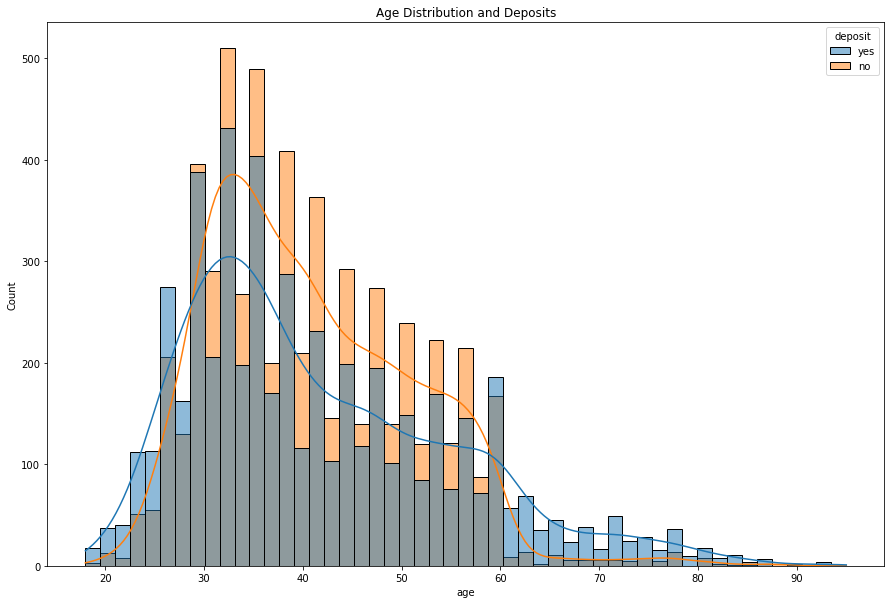

In [78]:
plt.figure(figsize=(15,10))
sns.histplot(x="age",hue="deposit",data=df, kde=True)
plt.title("Age Distribution and Deposits")
plt.show()

Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.

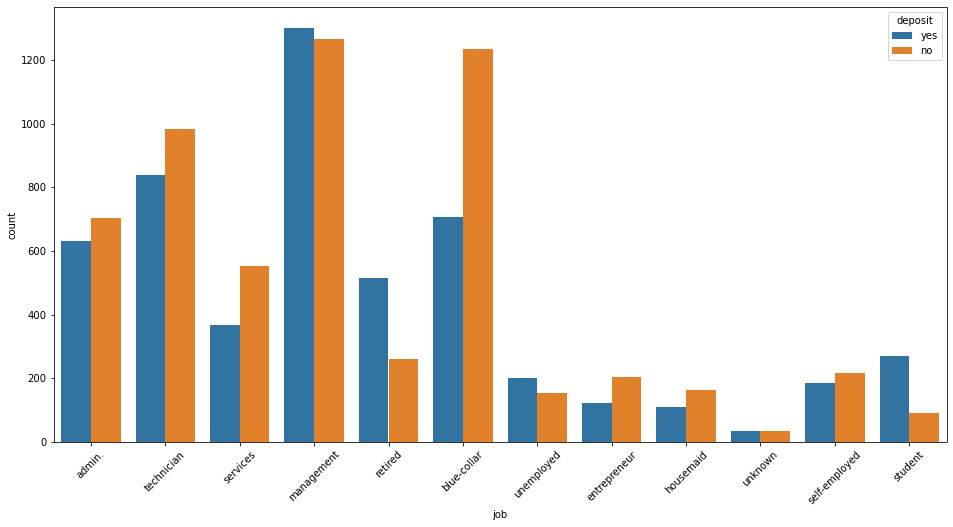

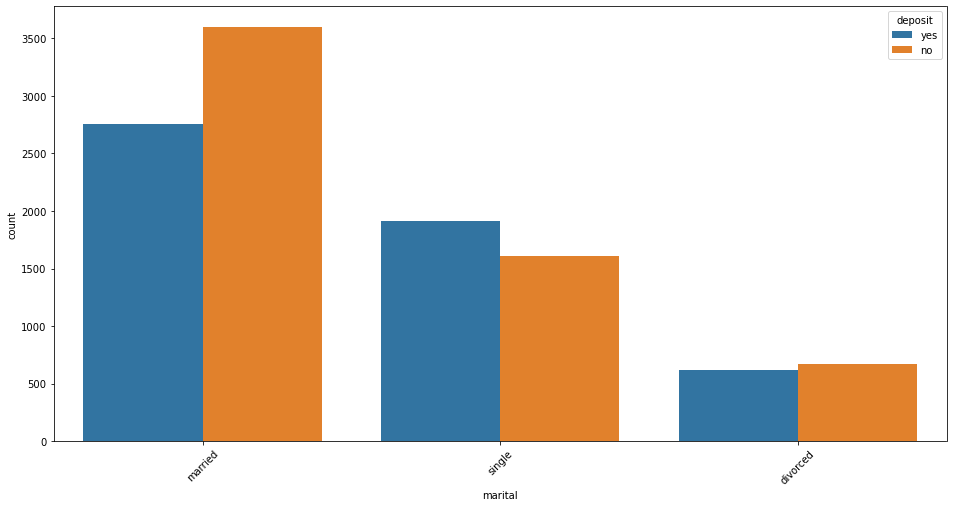

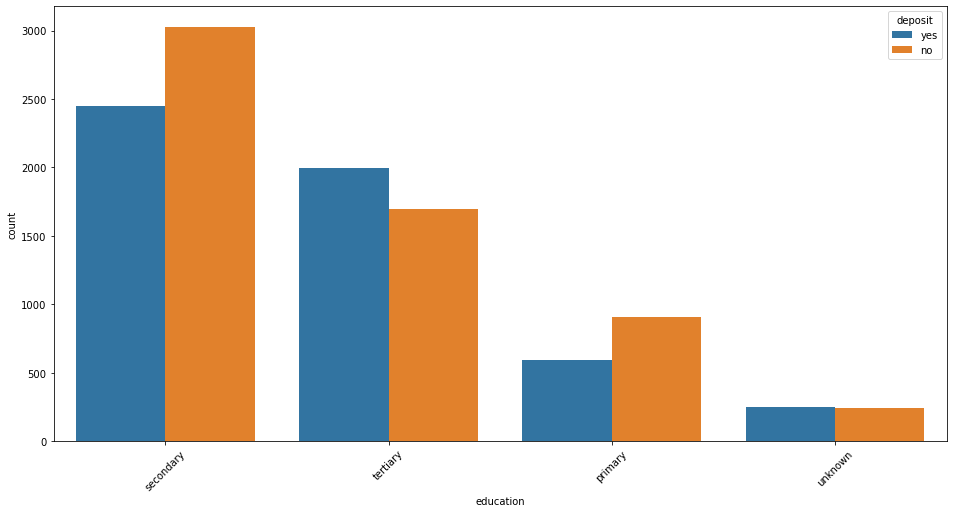

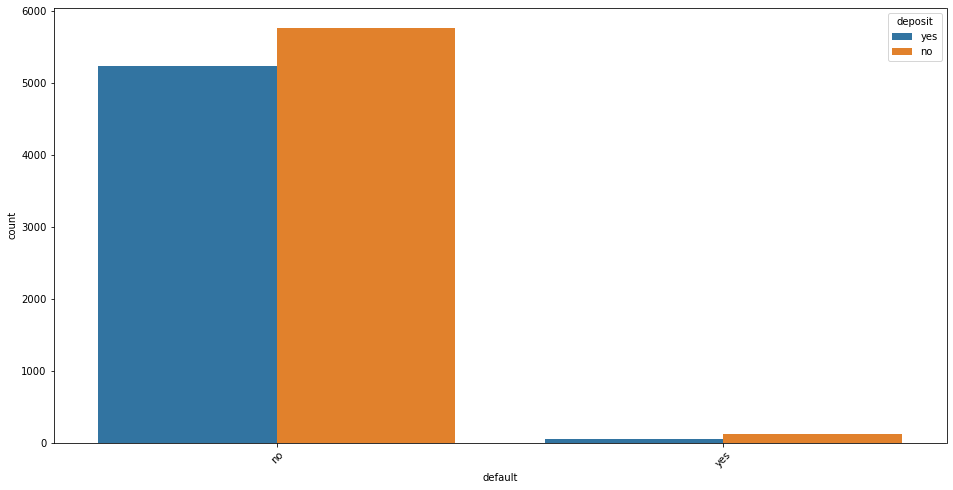

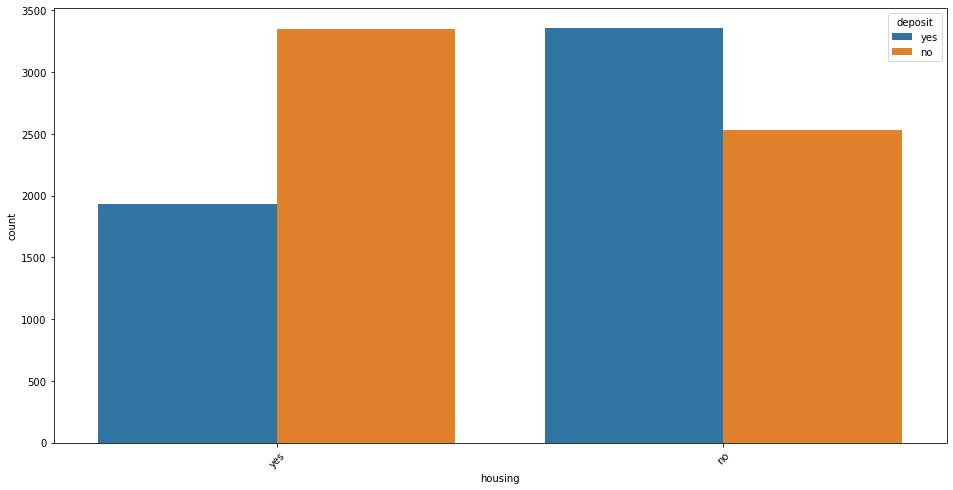

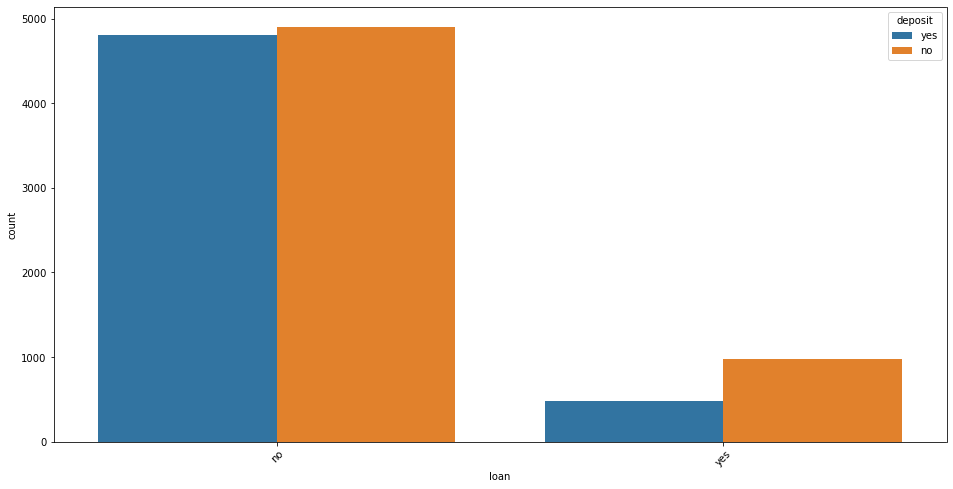

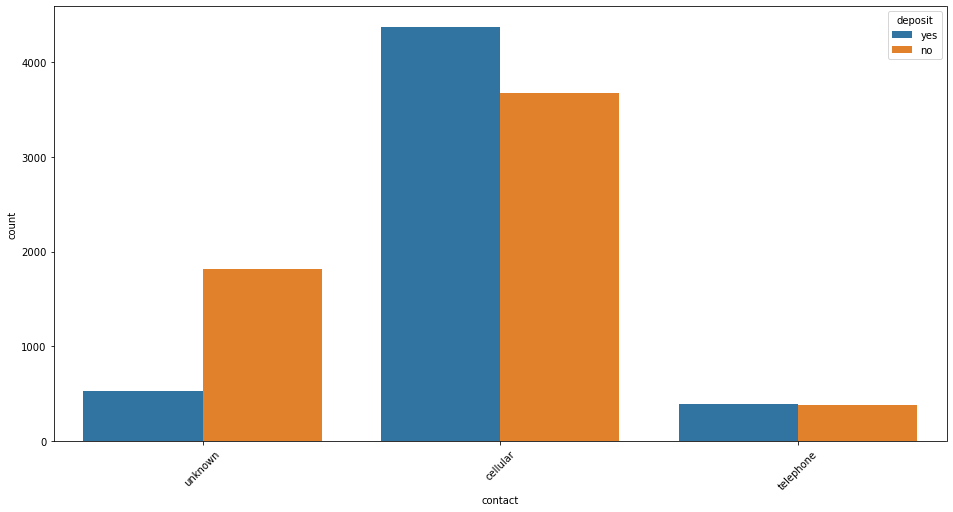

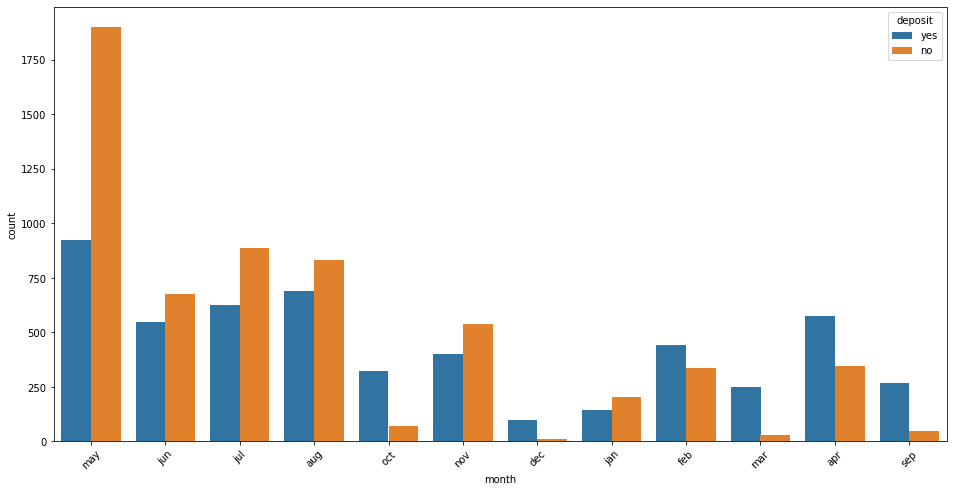

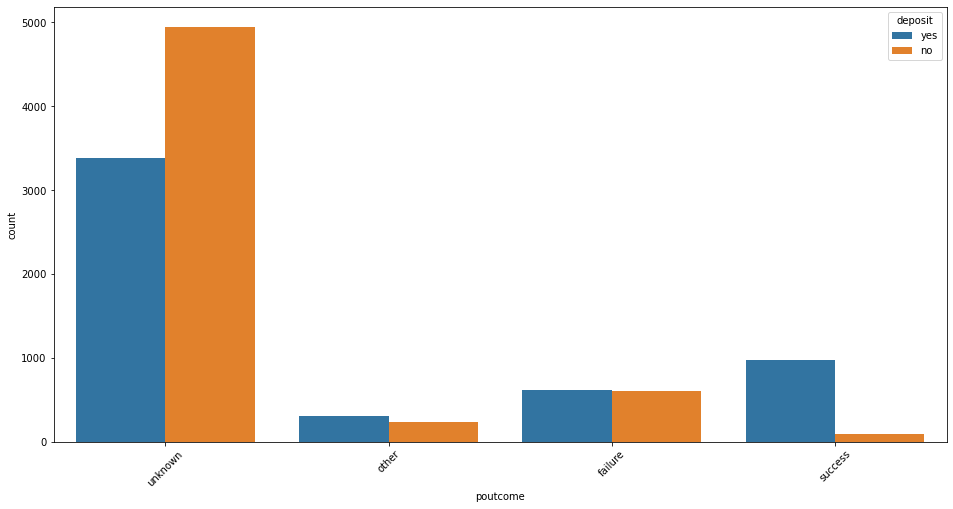

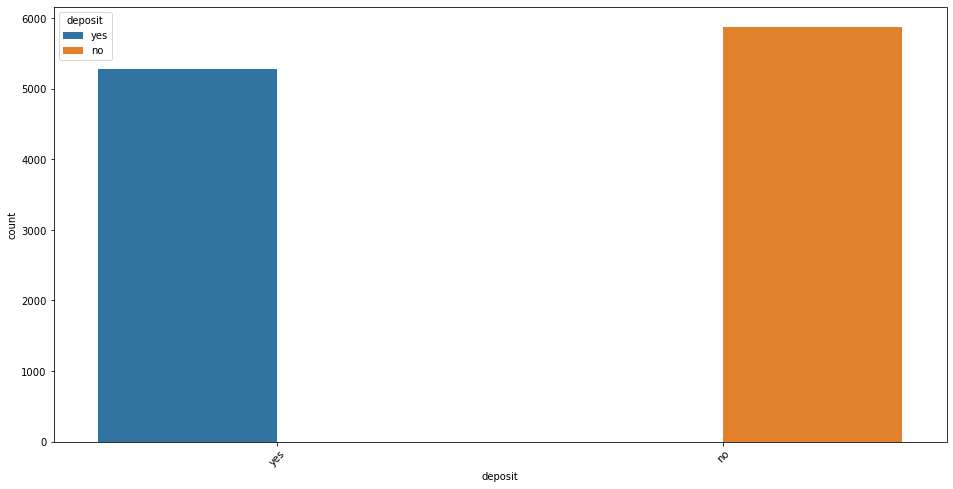

In [79]:
cat=[i for i in df.columns if df[i].dtypes=='object']
for i,features in enumerate(cat):
    plt.figure(figsize=(16,8))
    sns.countplot(df[features],data= df,hue ='deposit')
    plt.xticks(rotation= 45)
plt.show()


Distribution of Outcome (Term Deposits)

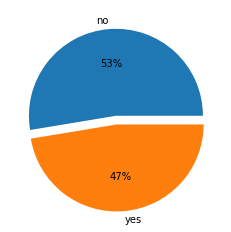

In [80]:
# Distribution of Outcome (Term Deposit)
df['deposit'].value_counts()
keys = df['deposit'].value_counts().index
data = df['deposit'].value_counts().values
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='default'>

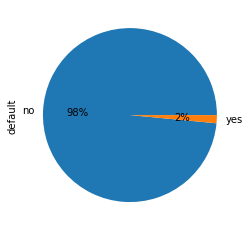

In [81]:
df['default'].value_counts().plot(kind='pie',autopct='%.0f%%')

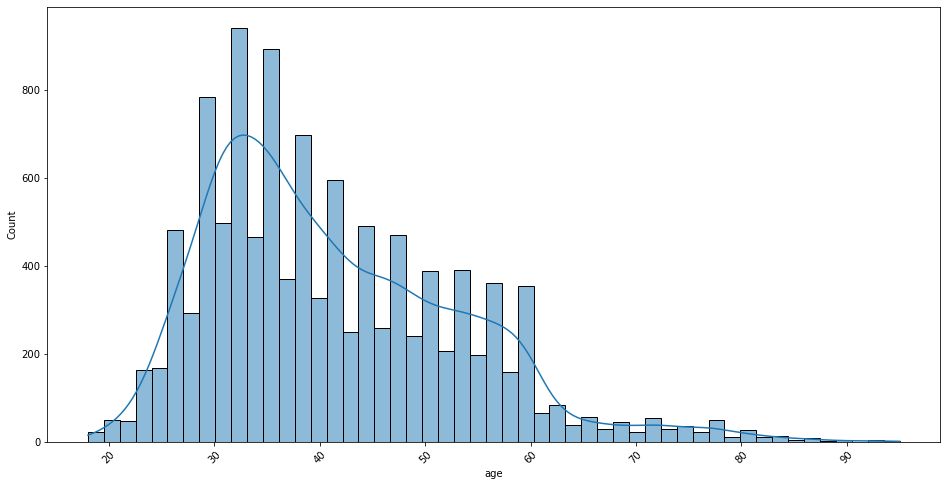

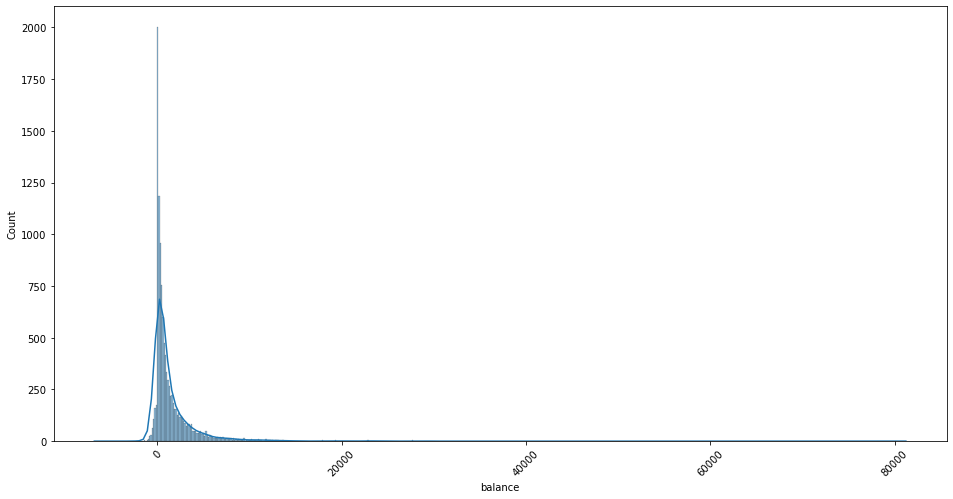

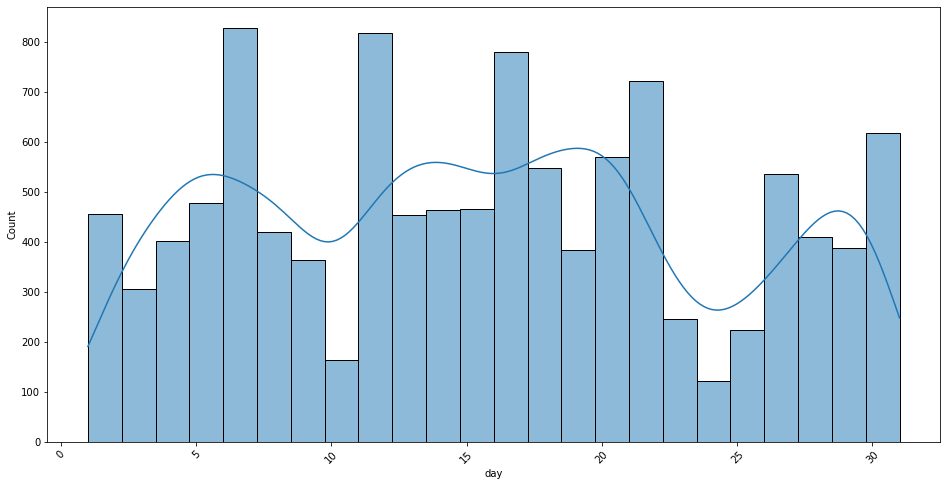

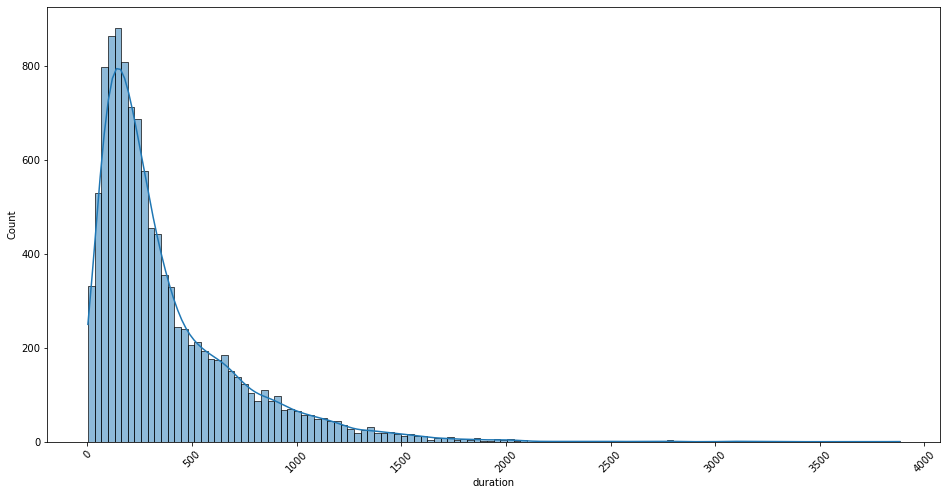

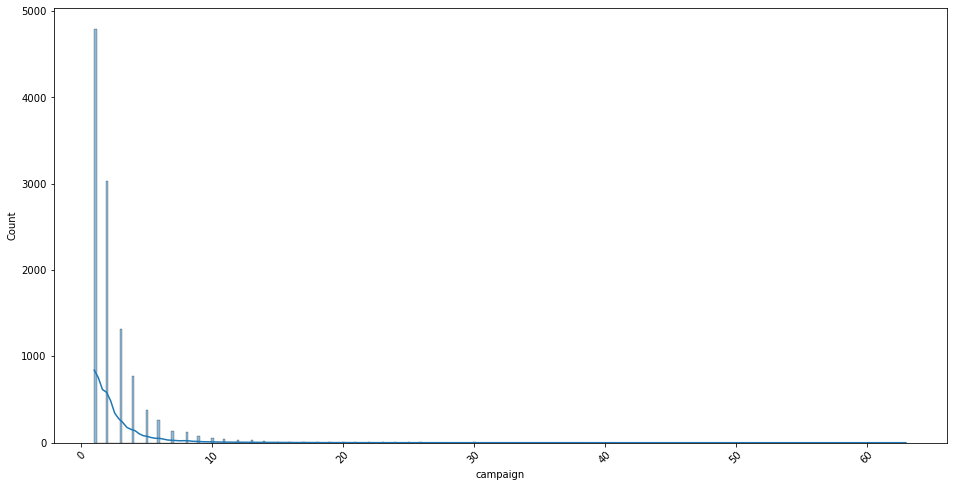

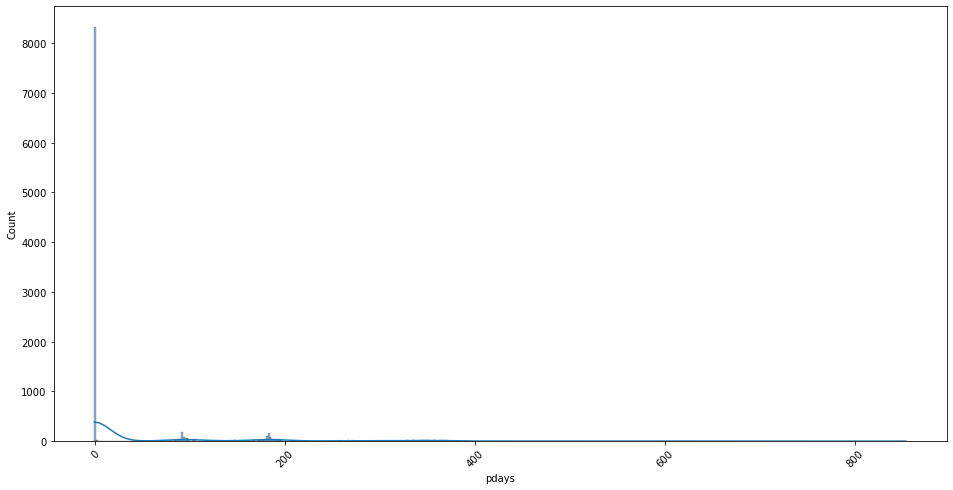

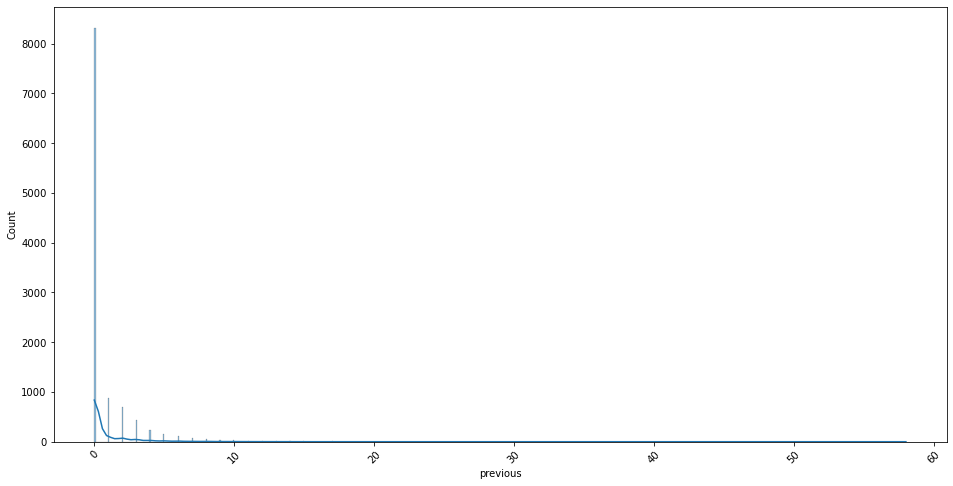

In [83]:
num =[i for i in df.columns if df[i].dtypes=='int64' or df[i].dtypes=='float']
for i,features in enumerate(num):
    plt.figure(figsize=(16,8))
    sns.histplot(df[features],kde=True)
    plt.xticks(rotation= 45)
plt.show()                                     

Let us now prepare our data for Model building
# Label Encoding Categorical Features

In [86]:
le = LabelEncoder()

df[cat] = df[cat].apply(le.fit_transform)

In [87]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1


Correlation Analysis using Heatmap

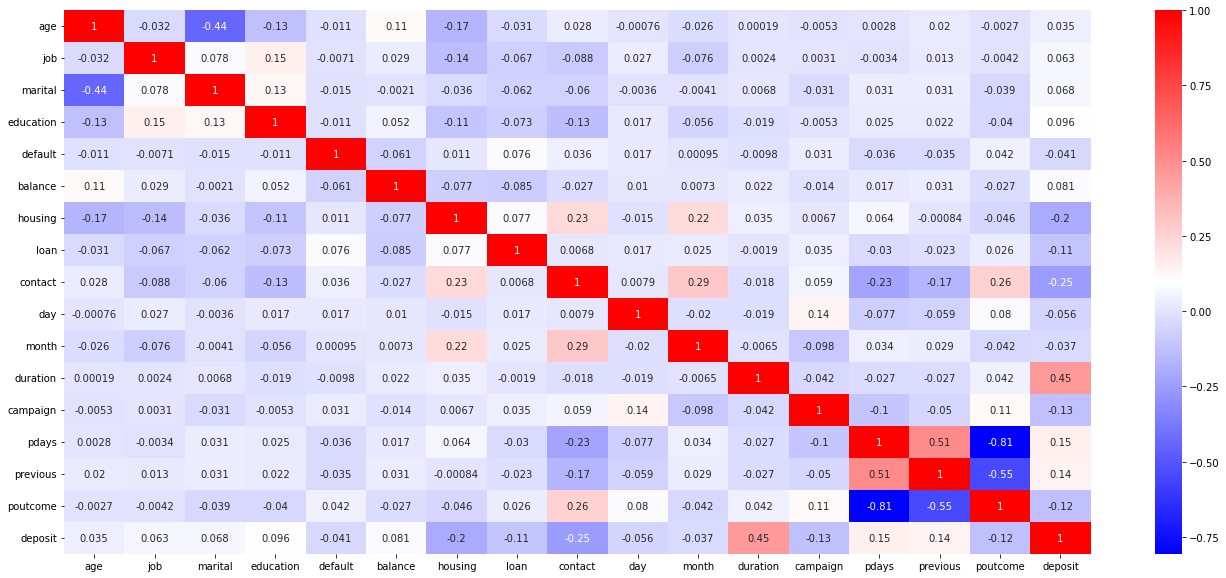

In [88]:
plt.figure(figsize=(23,10))
sns.heatmap(df.corr(), cmap='bwr', annot=True)
plt.show()

Deposit is positively correlated with duration of call and also shows pdays is correlation with previous(# of contacts before start campaign) attempts of call. This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.
Multicolinearty can be seen among some input features. This can be handled by dropping those variables or by performing LDA(Linear discriminant analysis) on the data.

# Standardisation

In [89]:
#Splitting input and output
X = df.drop("deposit", axis=1)
y = df['deposit']

In [90]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [91]:
X_scaled.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.491505,-1.391604,-0.318672,-0.380501,-0.123617,0.252525,1.055280,-0.387923,1.844786,-1.265746,0.800268,1.930226,-0.554168,-0.481184,-0.36326,0.520705
1,1.239676,-1.391604,-0.318672,-0.380501,-0.123617,-0.459974,-0.947616,-0.387923,1.844786,-1.265746,0.800268,3.154612,-0.554168,-0.481184,-0.36326,0.520705


# Model building - Decision Tree Classifier

In [92]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [93]:
print('Train Score: {}'.format(dt.score(train_X, train_y)))  
print('Test Score: {}'.format(dt.score(test_X, test_y)))  

Train Score: 0.9294765135031358
Test Score: 0.9202747088683189


In [94]:
cross_val_score(dt, train_X, train_y, cv=5).mean()

0.7762706407701135

In [98]:
ypred = dt.predict(test_X)
ypred

array([0, 1, 1, ..., 1, 1, 0])

# Hyperparameter tunning

In [99]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [100]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [101]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}

In [102]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20)

In [103]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

0.8179961055228013

we will use this best estimators to built our model.

In [104]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [105]:
y_pred= clf.predict(test_X)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [106]:
#Accuracy Score
accuracy = accuracy_score(test_y,y_pred)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 80.29262466407883


In [107]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  77.42690136760146


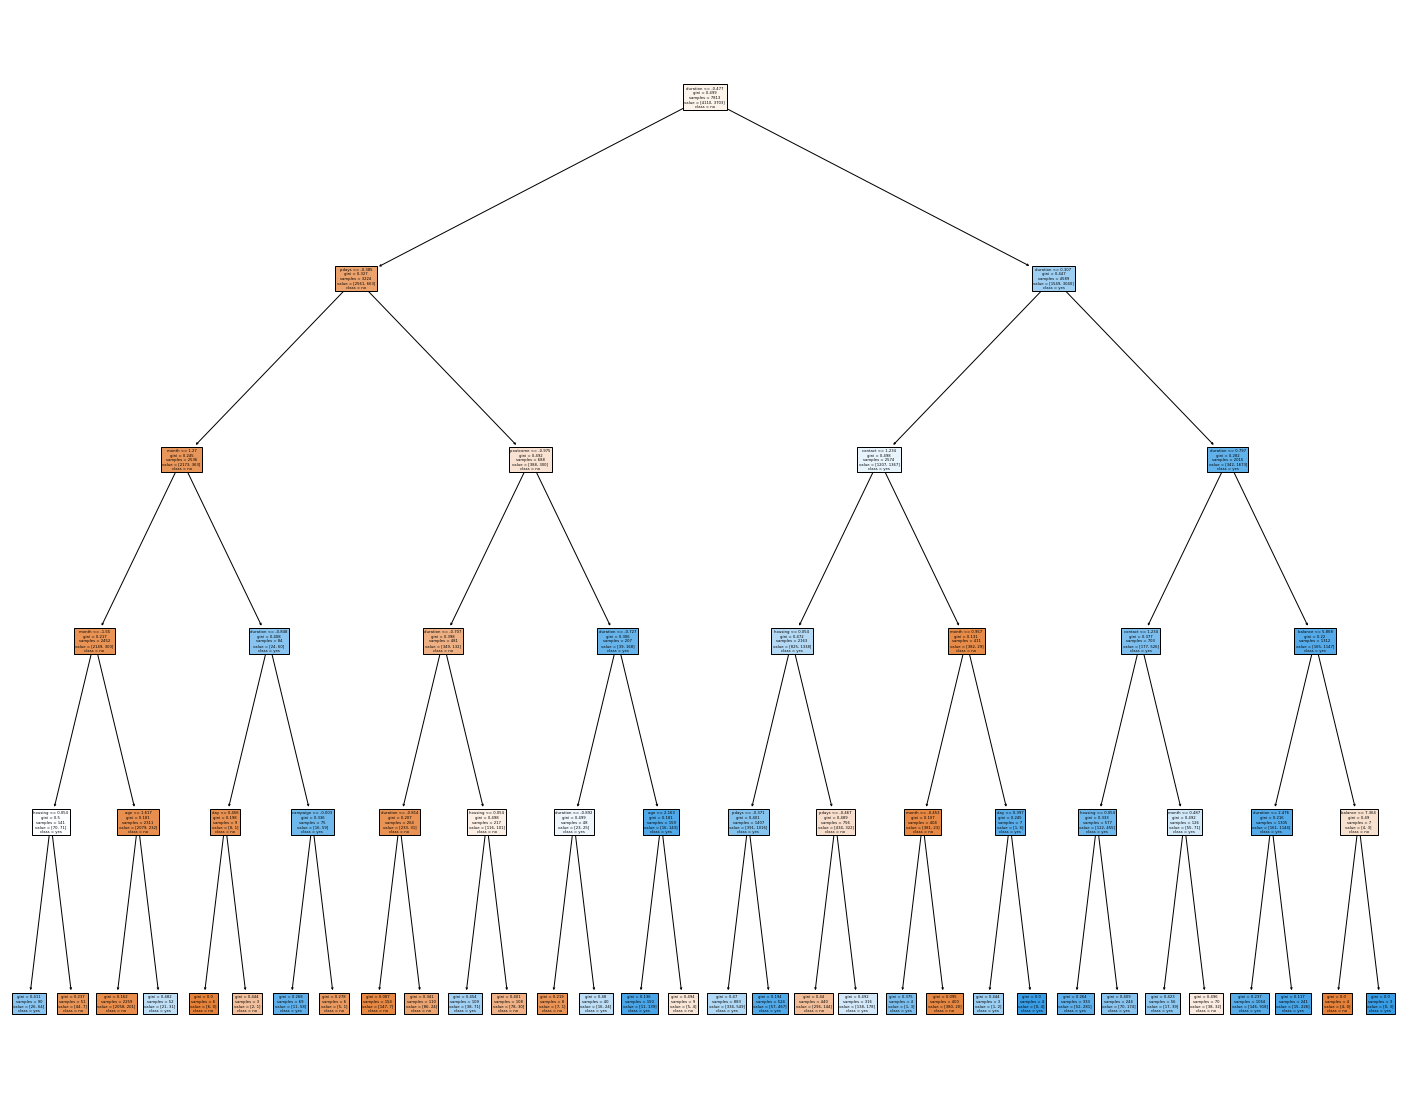

In [108]:
# Visualize the decision tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True,feature_names=X.columns,class_names=['no', 'yes'])
plt.show()

Accuracy: 0.7730665870409077


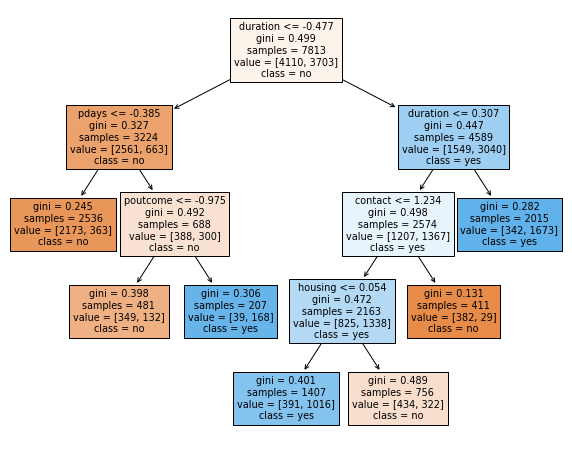

In [109]:
# Create the classifier with pruning enabled                  
dt = DecisionTreeClassifier(ccp_alpha=0.01)

# Train the classifier
dt.fit(train_X, train_y)

# Make predictions
ypred = dt.predict(test_X)

# Calculate accuracy
accuracy = accuracy_score(test_y, ypred)
print("Accuracy:", accuracy)
# Visualize the pruned decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(dt, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()

# Insights

* Majority of clients have occupation "Management", "blue-collar" or "Technician" and maximum clients subscribing to Term Deposit also are from these occupation.

* Clients and maximum subscribers to Term Deposit are mostly married.

* Most of the clients have secondary like University degree and have studied high or professional course.

* Clients subscribing to Term Deposits mostly have Home loan.

* Mostly subsciber given cellular contanct instead of telephonic.

* May month gain highest client term deposit followed by July ,August and December month least in the list.

* 47% of clients have subscribed to Term Deposit.

* 2% defaulters found.

* The duration of calls was a significant predictor of term deposit subscriptions. Clients tended to subscribe after longer conversations, suggesting the importance of engaging clients effectively during calls.Previous attempts at contact also played a role, indicating that repeated contact can be fruitful in convincing clients to subscribe.

* Multicollinearity among some input features was observed, potentially affecting model performance.

THANK YOU